In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.ticker as pltticker

In [2]:
world_cup_data = pd.read_csv("./World Cup 2018 Dataset.csv")
football_results = pd.read_csv("./results.csv")

In [3]:
world_cup_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Team                                  32 non-null     object 
 1   Group                                 32 non-null     object 
 2   Previous 
appearances                 32 non-null     float64
 3   Previous 
titles                      32 non-null     float64
 4   Previous
 finals                      32 non-null     float64
 5   Previous
 semifinals                  32 non-null     float64
 6   Current 
FIFA rank                    32 non-null     float64
 7   First match 
against                  32 non-null     object 
 8   Match index                           32 non-null     float64
 9   history with 
first opponent
 W-L     20 non-null     float64
 10  history with
 first opponent
 goals   20 non-null     float64
 11  Second match
 against

In [4]:
football_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42363 entries, 0 to 42362
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        42363 non-null  object 
 1   home_team   42363 non-null  object 
 2   away_team   42363 non-null  object 
 3   home_score  42329 non-null  float64
 4   away_score  42329 non-null  float64
 5   tournament  42363 non-null  object 
 6   city        42362 non-null  object 
 7   country     42362 non-null  object 
 8   neutral     42362 non-null  object 
dtypes: float64(2), object(7)
memory usage: 2.9+ MB


In [5]:
 world_cup_data.head()

,Team,Group,Previous \nappearances,Previous \ntitles,Previous\n finals,Previous\n semifinals,Current \nFIFA rank,First match \nagainst,Match index,history with \nfirst opponent\n W-L,history with\n first opponent\n goals,Second match\n against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Third match\n against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,NaN,NaN,Uruguay,33.0,0.0,0.0,NaN
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,NaN
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,NaN,NaN,Saudi Arabia,34.0,5.0,5.0,NaN
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,NaN
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,NaN


In [6]:
football_results.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


# Data Cleaning

In [7]:
world_cup_data.columns

Index(['Team', 'Group', 'Previous \nappearances', 'Previous \ntitles',
       'Previous\n finals', 'Previous\n semifinals', 'Current \nFIFA rank',
       'First match \nagainst', 'Match index',
       'history with \nfirst opponent\n W-L',
       'history with\n first opponent\n goals', 'Second match\n against',
       'Match index.1', 'history with\n second opponent\n W-L',
       'history with\n second opponent\n goals', 'Third match\n against',
       'Match index.2', 'history with\n third opponent\n W-L',
       'history with\n third opponent\n goals', 'Unnamed: 19'],
      dtype='object')

In [8]:
world_cup_data.isnull().sum()

Team                                       1
Group                                      1
Previous \nappearances                     1
Previous \ntitles                          1
Previous\n finals                          1
Previous\n semifinals                      1
Current \nFIFA rank                        1
First match \nagainst                      1
Match index                                1
history with \nfirst opponent\n W-L       13
history with\n first opponent\n goals     13
Second match\n against                     1
Match index.1                              1
history with\n second opponent\n W-L      11
history with\n second opponent\n goals    11
Third match\n against                      1
Match index.2                              1
history with\n third opponent\n W-L        5
history with\n third opponent\n goals      5
Unnamed: 19                               33
dtype: int64

In [9]:
world_cup_data.isnull()

,Team,Group,Previous \nappearances,Previous \ntitles,Previous\n finals,Previous\n semifinals,Current \nFIFA rank,First match \nagainst,Match index,history with \nfirst opponent\n W-L,history with\n first opponent\n goals,Second match\n against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Third match\n against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals,Unnamed: 19
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True


In [10]:
world_cup = world_cup_data.drop([32], axis=0)

In [11]:
world_cup_data.isnull()

,Team,Group,Previous \nappearances,Previous \ntitles,Previous\n finals,Previous\n semifinals,Current \nFIFA rank,First match \nagainst,Match index,history with \nfirst opponent\n W-L,history with\n first opponent\n goals,Second match\n against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Third match\n against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals,Unnamed: 19
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
5,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
7,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True


In [12]:
world_cup.fillna(value=0)

,Team,Group,Previous \nappearances,Previous \ntitles,Previous\n finals,Previous\n semifinals,Current \nFIFA rank,First match \nagainst,Match index,history with \nfirst opponent\n W-L,history with\n first opponent\n goals,Second match\n against,Match index.1,history with\n second opponent\n W-L,history with\n second opponent\n goals,Third match\n against,Match index.2,history with\n third opponent\n W-L,history with\n third opponent\n goals,Unnamed: 19
0,Russia,A,10.0,0.0,0.0,1.0,65.0,Saudi Arabia,1.0,-1.0,-2.0,Egypt,17.0,0.0,0.0,Uruguay,33.0,0.0,0.0,0.0
1,Saudi Arabia,A,4.0,0.0,0.0,0.0,63.0,Russia,1.0,1.0,2.0,Uruguay,18.0,1.0,1.0,Egypt,34.0,-5.0,-5.0,0.0
2,Egypt,A,2.0,0.0,0.0,0.0,31.0,Uruguay,2.0,-1.0,-2.0,Russia,17.0,0.0,0.0,Saudi Arabia,34.0,5.0,5.0,0.0
3,Uruguay,A,12.0,2.0,2.0,5.0,21.0,Egypt,2.0,1.0,2.0,Saudi Arabia,18.0,-1.0,-1.0,Russia,33.0,0.0,0.0,0.0
4,Porugal,B,6.0,0.0,0.0,2.0,3.0,Spain,3.0,-12.0,-31.0,Morocco,19.0,-1.0,-2.0,Iran,35.0,2.0,5.0,0.0
5,Spain,B,14.0,1.0,1.0,2.0,6.0,Portugal,3.0,12.0,31.0,Iran,20.0,0.0,0.0,Morocco,36.0,5.0,7.0,0.0
6,Morocco,B,4.0,0.0,0.0,0.0,40.0,Iran,4.0,-2.0,-2.0,Portugal,19.0,1.0,2.0,Spain,36.0,-5.0,-7.0,0.0
7,IRAN,B,4.0,0.0,0.0,0.0,32.0,Morocco,4.0,2.0,2.0,Spain,20.0,0.0,0.0,Portugal,35.0,-2.0,-5.0,0.0
8,France,C,14.0,1.0,2.0,5.0,9.0,Australia,5.0,1.0,6.0,Peru,21.0,-1.0,-1.0,Denmark,37.0,4.0,9.0,0.0
9,Australia,C,4.0,0.0,0.0,0.0,39.0,France,5.0,-1.0,-6.0,Denmark,22.0,-1.0,-3.0,Peru,38.0,0.0,0.0,0.0


In [13]:
world_cup.isnull().sum()

Team                                       0
Group                                      0
Previous \nappearances                     0
Previous \ntitles                          0
Previous\n finals                          0
Previous\n semifinals                      0
Current \nFIFA rank                        0
First match \nagainst                      0
Match index                                0
history with \nfirst opponent\n W-L       12
history with\n first opponent\n goals     12
Second match\n against                     0
Match index.1                              0
history with\n second opponent\n W-L      10
history with\n second opponent\n goals    10
Third match\n against                      0
Match index.2                              0
history with\n third opponent\n W-L        4
history with\n third opponent\n goals      4
Unnamed: 19                               32
dtype: int64

# Exploratory data Analysis

In [14]:
# finding who is the winner with goal difference
winner = []
for i in range(len(football_results['home_team'])):
    if football_results['home_score'][i]> football_results['away_score'][i]:
        winner.append(football_results['home_team'][i])
    elif football_results['home_score'][i]< football_results['away_score'][i]:
        winner.append(football_results['away_team'][i])
    else:
        winner.append('Draw')
football_results['winning_team'] = winner

#Goal difference column 
football_results['goal_diff'] = np.absolute(football_results['home_score']-football_results['away_score'])
football_results.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_diff
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Scotland,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Scotland,3.0
5,1876-03-25,Scotland,Wales,4.0,0.0,Friendly,Glasgow,Scotland,False,Scotland,4.0
6,1877-03-03,England,Scotland,1.0,3.0,Friendly,London,England,False,Scotland,2.0
7,1877-03-05,Wales,Scotland,0.0,2.0,Friendly,Wrexham,Wales,False,Scotland,2.0
8,1878-03-02,Scotland,England,7.0,2.0,Friendly,Glasgow,Scotland,False,Scotland,5.0
9,1878-03-23,Scotland,Wales,9.0,0.0,Friendly,Glasgow,Scotland,False,Scotland,9.0


In [15]:
#subset of data included games played by only one country 
game_results = football_results[(football_results['home_team'] == 'France')|(football_results['away_team'] == 'France')]
France = game_results.iloc[:]
France

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_diff
163,1904-05-01,Belgium,France,3.0,3.0,Friendly,Brussels,Belgium,False,Draw,0.0
166,1905-02-12,France,Switzerland,1.0,0.0,Friendly,Paris,France,False,France,1.0
175,1905-05-07,Belgium,France,7.0,0.0,Friendly,Brussels,Belgium,False,Belgium,7.0
185,1906-04-22,France,Belgium,0.0,5.0,Friendly,Saint-Cloud,France,False,Belgium,5.0
200,1907-04-21,Belgium,France,1.0,2.0,Friendly,Brussels,Belgium,False,France,1.0
...,...,...,...,...,...,...,...,...,...,...,...
42124,2021-06-02,France,Wales,3.0,0.0,Friendly,Nice,France,False,France,3.0
42226,2021-06-08,France,Bulgaria,3.0,0.0,Friendly,Paris,France,False,France,3.0
42319,2021-06-15,Germany,France,0.0,1.0,UEFA Euro,Munich,Germany,False,France,1.0
42335,2021-06-19,Hungary,France,NaN,NaN,UEFA Euro,Budapest,Hungary,False,Draw,NaN


In [16]:
#World Cup games played after year 1930
year = []
for row in France['date']:
    year.append(int(row[:4]))
France['match_year'] = year
france_first_cup = France[France.match_year >= 1930]
france_first_cup.count()

date            779
home_team       779
away_team       779
home_score      777
away_score      777
tournament      779
city            779
country         779
neutral         779
winning_team    779
goal_diff       777
match_year      779
dtype: int64

<AxesSubplot:xlabel='France_team_results', ylabel='count'>

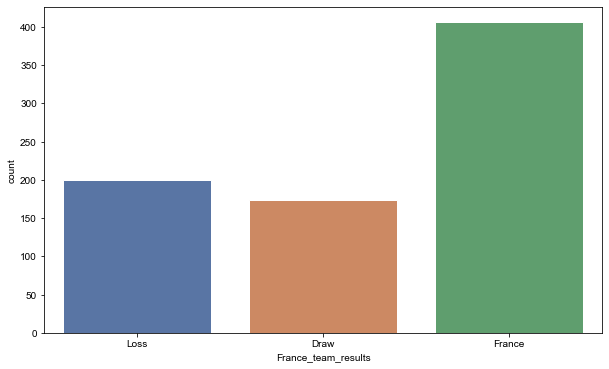

In [17]:
# visualization of most common outcome
game_wins = []
for row in france_first_cup['winning_team']:
    if row != 'France' and row != 'Draw':
        game_wins.append('Loss')
    else:
        game_wins.append(row)

country_wins = pd.DataFrame(game_wins, columns=['France_team_results'])

# Bar chart visualization
fig, ax = plt.subplots(1)
fig.set_size_inches(10,6)
sns.set(style = 'darkgrid')
sns.countplot(x='France_team_results', data = country_wins)

In [18]:
#create a dataframe with participating teams
worldcup_teams = football_results['country']
unique_teams = worldcup_teams.unique()

teams_home = football_results[football_results['home_team'].isin(unique_teams)]
teams_away = football_results[football_results['away_team'].isin(unique_teams)]
teams = pd.concat((teams_home,teams_away))

teams.count()

date            83435
home_team       83435
away_team       83435
home_score      83367
away_score      83367
tournament      83435
city            83433
country         83433
neutral         83433
winning_team    83435
goal_diff       83367
dtype: int64

In [19]:
teams.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_diff
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False,Draw,0.0
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False,England,2.0
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False,Scotland,1.0
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False,Draw,0.0
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False,Scotland,3.0


In [20]:
# create an year column to drop footbal games before 1930 for our reference
year = []
for row in teams['date']:
    year.append(int(row[:4]))

teams['match_year'] = year
teams_before = teams[teams.match_year >= 1930]
teams_before.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,winning_team,goal_diff,match_year
1267,1930-01-01,Spain,Czechoslovakia,1.0,0.0,Friendly,Barcelona,Spain,False,Spain,1.0,1930
1268,1930-01-12,Portugal,Czechoslovakia,1.0,0.0,Friendly,Lisbon,Portugal,False,Portugal,1.0,1930
1269,1930-01-26,Greece,Yugoslavia,2.0,1.0,Balkan Cup,Athens,Greece,False,Greece,1.0,1930
1270,1930-02-01,Northern Ireland,Wales,7.0,0.0,British Championship,Belfast,Northern Ireland,False,Northern Ireland,7.0,1930
1271,1930-02-09,Italy,Switzerland,4.0,2.0,Friendly,Rome,Italy,False,Italy,2.0,1930


In [21]:
teams_before = teams.drop(['date','home_score','away_score','tournament','city','country','goal_diff','match_year'], axis=1)
teams_before.head()

,home_team,away_team,neutral,winning_team
0,Scotland,England,False,Draw
1,England,Scotland,False,England
2,Scotland,England,False,Scotland
3,England,Scotland,False,Draw
4,Scotland,England,False,Scotland


# Building the Model

In [22]:
# converting winning team as 2 if the home_team won the match and draw team as 1 or if away_team won the match as 0
teams_before = teams_before.reset_index(drop=True)
teams_before.loc[teams_before.winning_team == teams_before.home_team,'winning_team'] = 2
teams_before.loc[teams_before.winning_team == 'Draw','winning_team'] = 1
teams_before.loc[teams_before.winning_team == teams_before.away_team,'winning_team'] = 0

teams_before.head(10)

,home_team,away_team,neutral,winning_team
0,Scotland,England,False,1
1,England,Scotland,False,2
2,Scotland,England,False,2
3,England,Scotland,False,1
4,Scotland,England,False,2
5,Scotland,Wales,False,2
6,England,Scotland,False,0
7,Wales,Scotland,False,0
8,Scotland,England,False,2
9,Scotland,Wales,False,2


In [23]:
from sklearn.model_selection import train_test_split

In [24]:
#convert home team and away team from categorical variables to continous inputs 
# Get dummy variables
final = pd.get_dummies(teams_before, prefix=['home_team', 'away_team'], columns=['home_team', 'away_team'])
final = final.fillna(value=-1)

# Separate X and y sets
X = final.drop(['winning_team'], axis=1)
y = final["winning_team"]
y = y.astype('int')

# Separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [25]:
final.head(15)

,neutral,winning_team,home_team_Abkhazia,home_team_Afghanistan,home_team_Albania,home_team_Alderney,home_team_Algeria,home_team_American Samoa,home_team_Andalusia,home_team_Andorra,...,away_team_Western Australia,away_team_Western Isles,away_team_Yemen,away_team_Yemen DPR,away_team_Ynys Môn,away_team_Yugoslavia,away_team_Zambia,away_team_Zanzibar,away_team_Zimbabwe,away_team_Åland Islands
0,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,False,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,False,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,False,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
from sklearn.linear_model import LogisticRegression



logreg = LogisticRegression()
logreg.fit(X_train, y_train)

score = logreg.score(X_train, y_train)
score2 = logreg.score(X_test, y_test)

print("Training set accuracy: ", '%.3f'%(score))
print("Test set accuracy: ", '%.3f'%(score2))

print("")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training set accuracy:  0.586
Test set accuracy:  0.577


Since our predictions is in the field of sports, we cannot predict with a higher accuracy who will win the game, as the conditions might change during the course of the game, and the game can turn around. From our model, we are having a training accuracy for around 58% and the test accuracy of 57%, which is decentlt good for predicting our model for a FIFA game.